In [ ]:

import pickle
from matplotlib import pyplot as plt
import torch

add_to_title =''
test_result = {}
test_type = {  # Choose which baseline to observe.
    'Finetune(qlora)': f'finetune_qlora{"_"+add_to_title if add_to_title!="" else ""}',
    'KAdapter': f'finetune_kadapter{"_"+add_to_title if add_to_title!="" else ""}',
    'MixReview(qlora)' : f'finetune_qlora_review{"_"+add_to_title if add_to_title!="" else ""}',
    'RecAdam(qlora)':f'finetune_qlora_recadam{"_"+add_to_title if add_to_title!="" else ""}',
    'RHO-1(qlora)': f'finetune_qlora_rho{"_"+add_to_title if add_to_title!="" else ""}',
    
    'TAALM(qlora)*': f'targeted_qlora_wo_knmask{"_"+add_to_title if add_to_title!="" else ""}',
    'Oracle':f"oracle_qlora_{add_to_title}"
}
for type0 in test_type:
    with open(f'results/lamackl/{test_type[type0]}.pkl','rb') as f:
        test_result[type0] = pickle.load(f)


In [33]:

real_result = {}
for i in test_type:
    real_result[i]={}
for type0 in test_type:
    real_result[type0][0]={'ppl_changed': test_result[type0]['eval_result'][0]['ppl_changed'], 'acc_changed': test_result[type0]['eval_result'][0]['acc_changed'],'ppl_unchanged': test_result[type0]['eval_result'][0]['ppl_unchanged'],'acc_unchanged': test_result[type0]['eval_result'][0]['acc_unchanged'], 'l2gap':torch.tensor(0.)}
    for epoch in test_result[type0]['eval_result'].keys():
        real_epoch = epoch+1
        real_result[type0][real_epoch]={}
        real_result[type0][real_epoch]['ppl_changed']= test_result[type0]['eval_result'][epoch]['ppl_changed']
        real_result[type0][real_epoch]['acc_changed']= test_result[type0]['eval_result'][epoch]['acc_changed']
        real_result[type0][real_epoch]['ppl_unchanged']= test_result[type0]['eval_result'][epoch]['ppl_unchanged']
        real_result[type0][real_epoch]['acc_unchanged']= test_result[type0]['eval_result'][epoch]['acc_unchanged']
        real_result[type0][real_epoch]['loss']= test_result[type0]['eval_result'][epoch]['loss']

{'Finetune(qlora)': {}, 'KAdapter': {}, 'MixReview(qlora)': {}, 'RecAdam(qlora)': {}, 'RHO-1(qlora)': {}, 'TALM(qlora)*': {}}


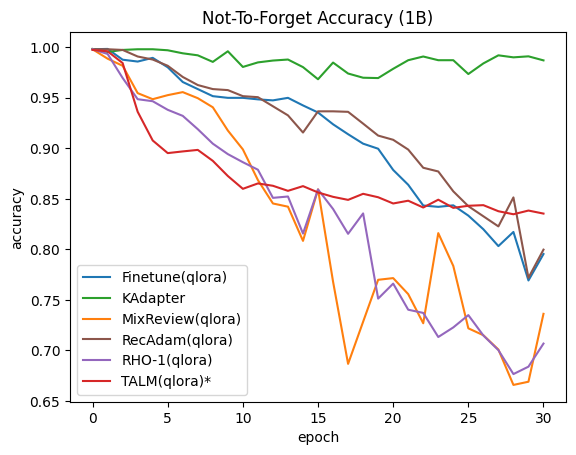

In [39]:
from matplotlib import pyplot as plt
from collections import defaultdict

##### Choose what to observe ######
# what_to_see = ['acc_changed']
# what_to_see = ['ppl_changed']
what_to_see = ['acc_unchanged']
# what_to_see = ['ppl_unchanged']
##################################
X=[]
Y_dic = defaultdict(list)
colors=['blue','green','orange','brown','purple','red']
for what0 in what_to_see:
    for type0, color in zip(real_result, colors): # finetune, targeted
        X=[]
        for epoch in real_result[type0]:
            X.append(epoch)
            Y_dic[f"{type0}-{what0}"].append(real_result[type0][epoch][what0])

        plt.plot(X, Y_dic[f"{type0}-{what0}"], label=f"{type0}", color=f"tab:{color}")
plt.xlabel('epoch')
plt.ylabel('accuracy')
# plt.title('To-Learn Accuracy (1B)')
# plt.title('Not-To-Forget Accuracy (1B)')
# plt.legend(loc='lower left')
plt.show()

In [20]:
#########
print("          Top Acc, Epoch, NF Acc, Total Knowledge")
X=[]
Y=[]
labels = []
for type0 in real_result:
    acc_changed = []
    for epoch, item in real_result[type0].items():
        # item['acc_changed'] + item['acc_unchanged']
        acc_changed.append(item['acc_changed'])

    # max_ind = (acc_changed).index(max(acc_changed))
    max_ind = (acc_changed).index(max(acc_changed))

    acc_ch = real_result[type0][max_ind]['acc_changed']
    acc_unch = real_result[type0][max_ind]['acc_unchanged']
    X.append(acc_ch)
    Y.append(acc_unch)
    labels.append(type0)
    print(f"{type0} : {acc_ch :.4f} , {max_ind} , {acc_unch :.4f} , {acc_ch + acc_unch :.4f}")

Finetune(qlora) : 0.1150 , 16 , 0.8174 , 0.9324
KAdapter : 0.1260 , 30 , 0.9980 , 1.1240
MixReview(qlora) : 0.0800 , 25 , 0.7988 , 0.8788
RecAdam(qlora) : 0.1000 , 24 , 0.7933 , 0.8933
RHO-1(qlora) : 0.1410 , 18 , 0.8223 , 0.9633
ours + Kadapter : 0.3320 , 21 , 0.9747 , 1.3067
ours(qlora) + MixReview : 0.4500 , 3 , 0.9012 , 1.3512
ours(qlora) + RecAdam : 0.4360 , 7 , 0.8982 , 1.3342
ours + Kadapter + RecAdam : 0.2640 , 13 , 0.9730 , 1.2370
ours + Kadapter + MixReview + RecAdam : 0.3140 , 25 , 0.9677 , 1.2817
ours(qlora) : 0.4290 , 4 , 0.8983 , 1.3273
